## CIFAR10模型特征

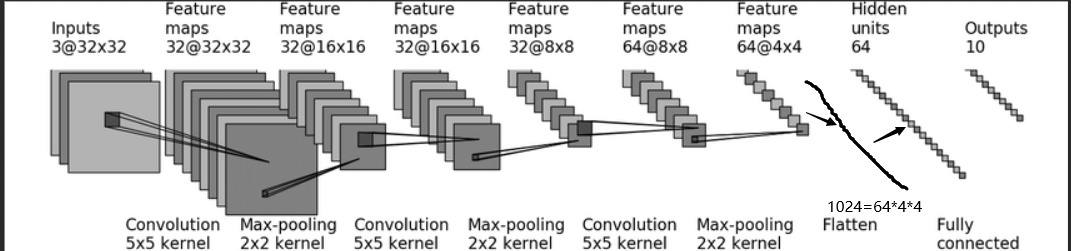

## 卷积后
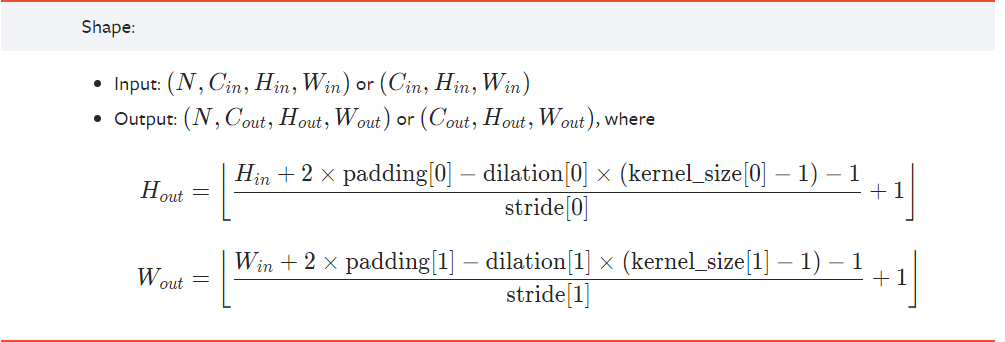

In [1]:
from torch import nn

In [2]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.conv1 = nn.Conv2d(3,32,5,padding=2)
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32,32,5,padding=2)
        self.maxpool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(32,64,5,padding=2)
        self.maxpool3 = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.liner1 = nn.Linear(1024,64)
        self.liner2 = nn.Linear(64,10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.liner1(x)
        x = self.liner2(x)
        return x

In [3]:
model = Model()
model

Model(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (liner1): Linear(in_features=1024, out_features=64, bias=True)
  (liner2): Linear(in_features=64, out_features=10, bias=True)
)

## 测试网络正确性

In [4]:
import torch

In [5]:
input = torch.ones((64,3,32,32))
input

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
        

In [6]:
output = model(input)
output

tensor([[-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  0.0059,  0.0380,  0.1087,  0.0750, -0.0888,  0.0296, -0.1218,
          0.2118, -0.0188],
        [-0.0861,  

In [7]:
output.shape

torch.Size([64, 10])

## Sequential搭建模型 

In [8]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2,self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,32,5,padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(1024,64),
            nn.Linear(64,10)
        )
    
    def forward(self,x):
        x = self.model(x)
        return x

In [9]:
model2 = Model2()

In [10]:
output2 = model2(input)
output2.shape

torch.Size([64, 10])

In [11]:
from torch.utils.tensorboard import SummaryWriter

In [12]:
writer = SummaryWriter("./实战_logs")

In [13]:
writer.add_graph(model2,input)

In [15]:
writer.close()

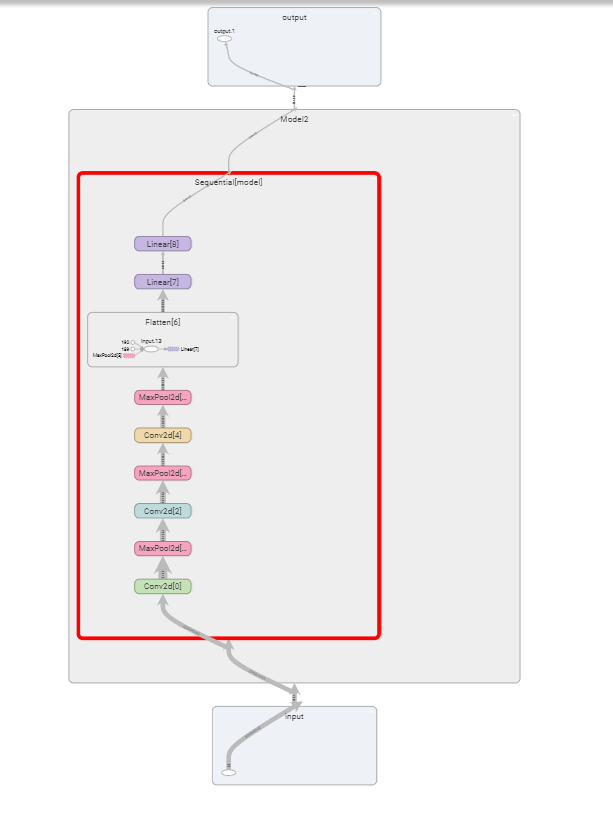